# 데이터 시각화 - Matplotlib 여러개 플롯

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시 시작

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

### 1. 여러개의 그래프

In [2]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)
    
def g(t):
    return np.sin(np.pi*t)

In [3]:
t1 = np.arange(0.0, 5.0, 0.01)
t2 = np.arange(0.0, 5.0, 0.01)

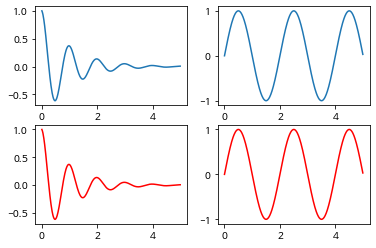

In [5]:
plt.subplot(221)        # 2 x 2, 그래프중 첫번째
plt.plot(t1, f(t1))
plt.subplot(2, 2, 2)
plt.plot(t2, g(t2))
plt.subplot(223)
plt.plot(t1, f(t1), 'r-')
plt.subplot(224)
plt.plot(t2, g(t2), 'r-')
plt.show()

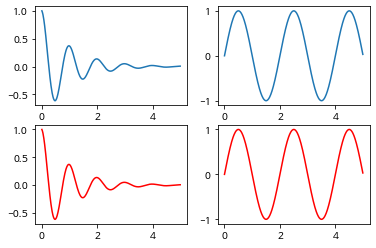

In [6]:
fig, axes = plt.subplots(2, 2)
axes[0,0].plot(t1, f(t1))
axes[0,1].plot(t2, g(t2))
axes[1,0].plot(t1, f(t1), 'r-')
axes[1,1].plot(t2, g(t2), 'r-')
plt.show()

### 2. Anscombe's Quartet
- 선형회귀선: y = 3.0 + 0.5 * x

In [7]:
ans = sns.load_dataset('anscombe')
ans.shape

(44, 3)

In [8]:
ans.head(3)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58


In [9]:
ans.tail(3)

,dataset,x,y
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89


In [10]:
# 요약 데이터
ans.groupby('dataset').describe()

x                           ...     y                          
        count mean       std  min  25%  ...   min    25%   50%   75%    max
dataset                                 ...                                
I        11.0  9.0  3.316625  4.0  6.5  ...  4.26  6.315  7.58  8.57  10.84
II       11.0  9.0  3.316625  4.0  6.5  ...  3.10  6.695  8.14  8.95   9.26
III      11.0  9.0  3.316625  4.0  6.5  ...  5.39  6.250  7.11  7.98  12.74
IV       11.0  9.0  3.316625  8.0  8.0  ...  5.25  6.170  7.04  8.19  12.50

[4 rows x 16 columns]

- Dataset I 에 대해서 산점도와 회귀선 그리기

In [11]:
ds1 = ans[ans.dataset == 'I']
ds1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


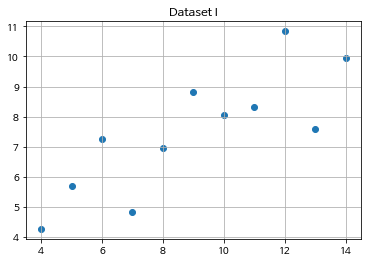

In [12]:
plt.scatter(ds1.x, ds1.y)
plt.title('Dataset I')
plt.grid()
plt.show()

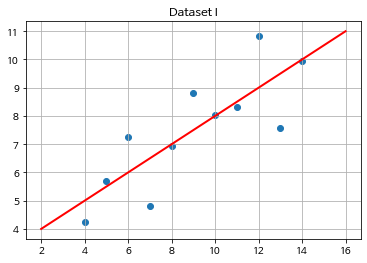

In [14]:
plt.scatter(ds1.x, ds1.y)
plt.plot([2,16], [4,11], c='r', lw=2)
plt.title('Dataset I')
plt.grid()
plt.show()

- 4개의 데이터 셋

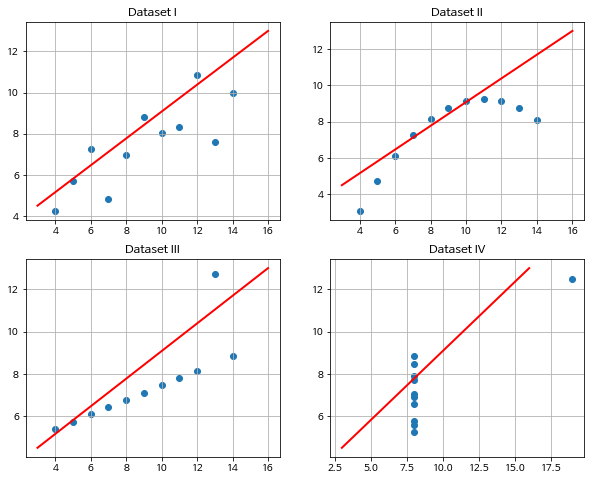

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for index, roman in enumerate(['I','II','III','IV']):
    ds = ans[ans.dataset == roman]
    ax = axes[index//2, index%2]
    ax.scatter(ds.x, ds.y)
    ax.plot([3,16], [4.5,13], c='r', lw=2)
    ax.set_title(f'Dataset {roman}')
    ax.grid()

plt.show()

- 그림을 세련되게

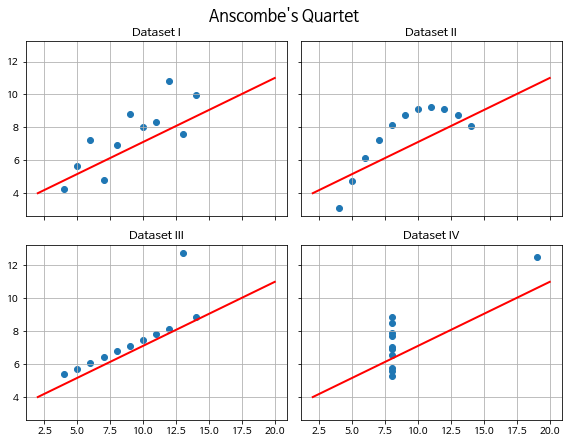

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(8,6), sharex=True, sharey=True)

for index, roman in enumerate(['I','II','III','IV']):
    ds = ans[ans.dataset == roman]
    ax = axes[index//2, index%2]
    ax.scatter(ds.x, ds.y)
    ax.plot([2,20], [4,11], c='r', lw=2)
    ax.set_title(f'Dataset {roman}')
    ax.grid()

plt.suptitle("Anscombe's Quartet", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

- 파일로 저장

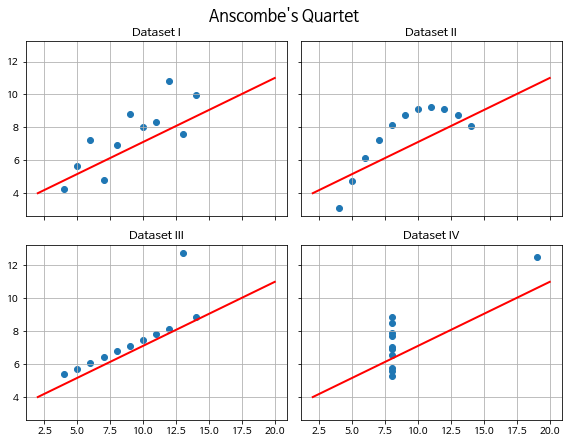

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(8,6), sharex=True, sharey=True)

for index, roman in enumerate(['I','II','III','IV']):
    ds = ans[ans.dataset == roman]
    ax = axes[index//2, index%2]
    ax.scatter(ds.x, ds.y)
    ax.plot([2,20], [4,11], c='r', lw=2)
    ax.set_title(f'Dataset {roman}')
    ax.grid()

plt.suptitle("Anscombe's Quartet", fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('anscombe.png')